## Name:- Ankita Chhattani

## Iot & Computer Vision Intern at The Sparks Foundation

## Batch:-Mar-21

## Task:- Object Detection in Images and Video

In [2]:
import cv2

In [3]:
import matplotlib.pyplot as plt


In [4]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [5]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)



In [6]:
classLabels = [] ## empty list of python
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
        classLabels = fpt.read().rstrip('\n').split('\n')
        #classLabels.append(fpt.read())


In [7]:
print(classLabels)


['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [8]:
print(len(classLabels))


80


In [9]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ## 255/2 = 127.5
model.setInputMean((127.5,127.5,127.5)) ## mobilenet => [-1,1]
model.setInputSwapRB(True)


<dnn_Model 000001B98DBB89B0>

# read an image


In [10]:
img = cv2.imread('trafficpicture.jpg')


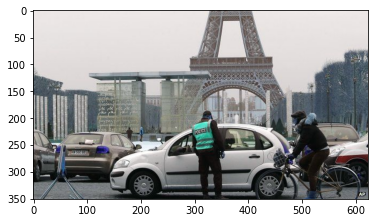

In [12]:
plt.imshow(img)

In [13]:
classIndex, confidece, bbox = model.detect(img,confThreshold=0.5)


In [14]:
print(classIndex)


[[3]
 [1]
 [3]
 [3]
 [3]
 [3]
 [2]
 [1]]


In [15]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for classInd, conf, boxes in zip(classIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img,boxes,(255, 0, 0), 2 )
    cv2.putText(img,classLabels[classInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0), thickness = 3 )


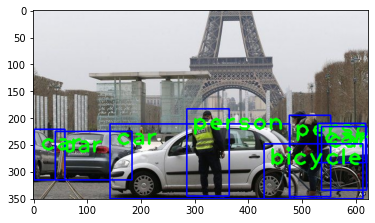

In [16]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))



# For Video

In [17]:
cap = cv2.VideoCapture("trafficvideo.mp4")

if not cap.isOpened():
    cap=cv2.videocapture(0)
if not cap.isOpened():
    raise IOerror("cannot open video")

font_scale =3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()

    ClassIndex , confidence , bbox = model.detect(frame,confThreshold=0.55)

    print(ClassIndex)
    if (len(ClassIndex)!=0) :
        for ClassInd , conf , boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255, 0, 0), 2 )
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0), thickness = 3 )
    cv2.imshow('Object Detection Tutorial ' , frame)

    if cv2.waitKey(2) & 0XFF == ord('q'):
        break

cap.realase()
cv2.destroyAllWindows() 

[[1]
 [3]
 [3]
 [3]
 [1]
 [1]
 [3]
 [3]
 [3]
 [1]
 [1]]
[[1]
 [3]
 [3]
 [3]
 [1]
 [1]
 [3]
 [3]
 [3]
 [1]
 [1]]
[[1]
 [3]
 [3]
 [3]
 [3]
 [1]
 [1]
 [1]
 [3]
 [1]
 [3]]
[[1]
 [3]
 [3]
 [3]
 [3]
 [1]
 [3]
 [3]
 [1]
 [1]
 [1]]
[[3]
 [1]
 [3]
 [3]
 [3]
 [1]
 [3]
 [1]
 [3]
 [1]
 [1]]
[[3]
 [1]
 [3]
 [3]
 [3]
 [3]
 [1]
 [1]
 [3]]
[[3]
 [1]
 [3]
 [3]
 [3]
 [1]
 [3]
 [1]
 [1]
 [1]
 [3]]
[[3]
 [3]
 [1]
 [3]
 [1]
 [3]
 [3]
 [1]
 [1]
 [1]]
[[3]
 [3]
 [1]
 [3]
 [1]
 [1]
 [3]
 [3]]
[[3]
 [3]
 [1]
 [3]
 [1]
 [3]
 [1]
 [3]]
[[3]
 [1]
 [3]
 [3]
 [1]
 [3]
 [1]
 [3]]
[[3]
 [1]
 [3]
 [3]
 [1]
 [3]
 [1]
 [3]
 [1]]
[[ 3]
 [ 3]
 [ 1]
 [ 3]
 [ 3]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [10]
 [ 2]
 [ 2]]
[[ 3]
 [ 1]
 [ 3]
 [ 3]
 [ 1]
 [10]
 [ 3]
 [ 3]
 [ 1]]
[[ 3]
 [ 1]
 [ 3]
 [10]
 [ 1]
 [ 3]]
[[ 3]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 3]
 [10]
 [ 3]
 [ 1]
 [ 3]]
[[ 3]
 [ 1]
 [ 3]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 3]
 [10]]
[[3]
 [1]
 [1]
 [3]
 [1]
 [3]
 [1]
 [3]]
[[3]
 [1]
 [1]
 [3]
 [1]
 [3]
 [1]
 [3]
 [1]]
[[ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]


[[3]
 [3]
 [1]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [1]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [1]
 [3]
 [3]]
[[3]
 [3]
 [1]
 [3]
 [3]]
[[3]
 [3]
 [1]
 [3]
 [3]]
[[3]
 [3]
 [1]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [1]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [1]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [1]
 [3]]
[[3]
 [1]
 [3]
 [3]
 [3]]
[[3]
 [1]
 [3]
 [3]
 [3]]
[[3]
 [1]
 [3]
 [3]
 [3]]
[[3]
 [1]
 [3]
 [1]
 [3]]
[[3]
 [1]
 [3]
 [1]
 [3]]
[[1]
 [3]
 [3]
 [1]]
[[1]
 [3]
 [3]
 [1]
 [1]
 [3]
 [3]]
[[1]
 [3]
 [3]
 [1]
 [3]
 [3]]
[[1]
 [3]
 [3]
 [3]
 [3]]
[[1]
 [3]
 [3]
 [1]
 [3]
 [3]]
[[1]
 [3]
 [3]
 [3]]
[[1]
 [3]
 [3]
 [3]
 [1]]
[[1]
 [3]
 [3]
 [3]]
[[3]
 [1]
 [3]
 [1]
 [3]]
[[3]
 [1]
 [3]
 [1]
 [1]]
[[3]
 [1]
 [1]
 [3]
 [1]]
[[3]
 [1]
 [1]
 [3]]
[[3]
 [1]
 [1]
 [3]]
[[3]
 [1]
 [1]
 [3]]
[[3]
 [1]
 [1]
 [3]]
[[1]
 [3]
 [1]
 [3]
 [3]]
[[1]
 [3]
 [1]
 [3]
 [3]]
[[1]
 [3]
 [3]
 [3]]
[[1]
 [3]]
[[3]
 [1]
 [3]
 [3]]
[[3]
 [1]
 [3]
 [3]]
[[3]
 [1]
 [1]
 [3]]
[[3]
 [3]
 [1]
 [3]]
[[1]
 [3]
 [1]]
[[3]
 [1]]
[[3]
 [1]
 [3]
 [1]]
[[3]
 [1]
 [3]
 [1]]
[[3]

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
